#Requisitos 

* Set de datos sucio

* No copiar trabajos de internet

**Criterio de búsqueda para el Data Set:** [Dirty Datasets Kaggle](https://www.kaggle.com/general/266145)

[Data Sets](https://analyticsindiamag.com/10-datasets-for-data-cleaning-practice-for-beginners/)

**Data Set:** [Hotel booking demand](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

**Descripción:** el conjunto de datos contiene información sobre las reservaciones de dos hoteles ubicados en Portugal. Uno de los hoteles es de carácter turístico y está localizado en la región de Algarve ('Resort Hotel'), el cual cuenta con 40,060 registros. El otro hotel se encuentra en la ciudad de Lisboa ('City Hotel') y cuenta con 79,330 registros. Cada registro representa una reservación realizada entre 2015 y 2017. El conjunto de datos tiene 32 variables.

[Aquí](https://www.sciencedirect.com/science/article/pii/S2352340918315191) podemos encontrar el significado de cada columna para 31 variables. Una variable adicional ('hotel') especifica el tipo de hotel.

 # Estructura del trabajo

 Nos concentraremos en 3 grandes secciones para este trabajo 

 <ul>
 <li>Entender los datos</li>
 <li>Limpiar los datos</li>
 <li>Análisis de datos</li>
 </ul>

# Entender los datos



In [ ]:
import pandas as pd
import torch as torch
import numpy as np
import seaborn as sns


In [ ]:
#Se importan los datos en formato .csv
df= pd.read_csv("https://raw.githubusercontent.com/sebaszx/Tarea1Modulo2CienciasDatos/main/hotel_bookings.csv")

In [ ]:
#Se imprimen las columnas junto con sus tipos
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Tamaño del data set

In [ ]:
#Se imprime el tamaño del data frame para ver con cuantos datos estamos trabajando
df.shape # Filas : 119390
         # Columnas : 32     

(119390, 32)

Vamos a dar la primera vista a nuestro nuevo set de datos:

In [ ]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


Existen algunas columnas que no tienen un tipo explícito, como por ejemplo integer or float. Por eso creamos un sub dataframe para ver qué clase de contenido tienen esas columnas de tipo Object.

In [ ]:
object_columns = df.select_dtypes(include=['object'])
#Se visualizan los primeros 5 registros
object_columns.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


In [ ]:
#También se visualizan los últimos 5 registros
object_columns.tail()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07
119389,City Hotel,August,HB,DEU,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


Tras explorar un poco más los datos podemos concluir que las columnas de tipo Object podríamos tomarlas como columnas de tipo string y date.

In [ ]:
#Con el comando nunique podemos contar los distintos valores para cada columna 
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

# Limpiar los datos

En esta sección detectaremos filas vacías o filas que tengan elementos de tipo NaN.

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Se puede observar que las columnas que muestran datos faltantes son 

1.   country
2.   agent
3.   company
4.   children

Fórmula para el porcentaje 
$ =\frac{porción}{total}$

**Country:** En el caso de country podríamos decir que no es tan grave debido que de las 119330 filas del dataset, solo 488 representan datos faltantes, lo que nos da que solo un 0.4% de los valores de country son datos faltantes.

**Agent:** Con la columna Agent la situación es un poco distinta, ya que el porcentaje es de 13.68%.

**Company:** Company representa uno de los peores casos que se puede obtener, ya que el 94.30% de sus datos son valores faltantes.

**Children:** Al contrario, children es el mejor de los peores casos, ya que representa solo un 0.003%.

## Acciones a tomar para las 4 columnas que tienen datos faltantes

**Country:** Para el caso de country se va a tomar el valor más repetido (la moda) para reemplazarlos.

**Agent:** Para Agent igualmente se planea rellenar los datos con el valor más repetido (la moda).

**Company:** Como hay tanta información faltante, se optará por eliminar la columna por completo.

**Children:** Para Children se rellenarán los valores faltantes con el promedio de la columna y se redondeará ya que no podemos tener decimales.

*Como medida adicional, se evitará emplear estas variables en el análisis preliminar, y si fuera necesario incluirlas en etapas posteriores del proyecto se recomendaría experimentar con otras alternativas. Por ahora se tomarán las acciones mencionadas con dicha precaución.*

In [ ]:
#Para mostrar todas las filas que contengan datos faltantes
df1 = df[df.isna().any(axis=1)]

In [ ]:
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


###Country

El dato país que más se repite es PRT.

In [ ]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [ ]:
#Se sustituyen los NaN con 'PRT'
df.country = df.country.fillna('PRT')

###Agent

El código de agente que más se repite es 9.0.

In [ ]:
df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [ ]:
#Se sustituyen los NaN con '9.0'
df.agent = df.agent.fillna(9.0)

###Company
Se elimina la columna por completo.

In [ ]:
df.drop("company", axis=1, inplace=True)

###Children

Se calcula el promedio de la columna y se redondea.

In [ ]:
mean_value=df['children'].mean()
print(mean_value)
print(np.round(mean_value))

#Se sustituyen los NaN con el valor obtenido
df['children'].fillna(value=np.round(mean_value), inplace=True)

0.10388990333874994
0.0


Comprobación de que ya no hay datos faltantes:

In [ ]:
df1 = df[df.isna().any(axis=1)]
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Se eliminan las filas de market_segment que tienen como dato Undefined.

In [ ]:
df[df['market_segment']=='Undefined']
df.drop(df[df.market_segment =='Undefined'].index, inplace=True)
df[df['market_segment']=='Undefined']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


## Conversión de datos de tipo Object a String y Date
Anteriormente verificamos que las columnas de tipo de Object no son más que columnas con strings.

Asimismo, la columna reservation_status_date corresponde a un formato de fecha.

In [ ]:
for columnas in df.select_dtypes(include=['object']):
  df[columnas]=df[columnas].astype('string') 

#Date
df.reservation_status_date=pd.to_datetime(df['reservation_status_date'], infer_datetime_format=True)

In [ ]:
df.dtypes

hotel                                     string
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        string
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      string
country                                   string
market_segment                            string
distribution_channel                      string
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        string
assigned_room_type  

##Columnas derivadas

Se crea la columna TotalRate que es el resultado de Multiplicar el Average Daily Rate (adr) por la suma de los stays_in_weekend_nights con los stays_in_week_nights. Y así podemos obtener el pago total promedio durante la estadía de los ocupantes en cada reservación.

In [ ]:
df['TotalRate']= df['adr']* (df['stays_in_weekend_nights']+df['stays_in_week_nights'])

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,TotalRate
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,196.0


Se eliminaran todas las filas cuyo TotalRate sea igual o menor que cero ya que no tiene sentido tener datos de personas que nunca se hospedaron.

Estos registros probablemente representan cancelaciones o casos en que los clientes no se presentaron (*no show*).

In [ ]:
np.sum(df['TotalRate'] <= 0)

1960

In [ ]:
df.drop(df[df.TotalRate <= 0].index, inplace=True)

#Análisis de datos

Pandas nos da muchas herramientas para poder explorar los datos, entre ellas está el método $describe$  que se utiliza para calcular algunos datos estadísticos como percentil, media y desviación estándar de los valores numéricos de la Serie o DataFrame.

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,TotalRate
count,117428.000000,117428.000000,117428.000000,117428.000000,117428.000000,117428.000000,117428.000000,117428.000000,117428.000000,117428.000000,117428.000000,117428.000000,117428.000000,117428.000000,117428.000000,117428.000000,117428.000000,117428.000000,117428.000000,117428.000000
mean,0.374774,105.086104,2016.160294,27.136697,15.803020,0.936429,2.521247,1.860621,0.104507,0.007869,0.027872,0.086955,0.125336,0.216490,76.358083,2.337977,103.532326,0.062643,0.571022,363.827310
std,0.484067,106.907067,0.706554,13.575781,8.783521,0.995765,1.893743,0.482094,0.399693,0.097169,0.164608,0.848697,1.446216,0.633193,106.449536,17.677201,49.197782,0.245567,0.791650,335.477888
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.260000,0.000000,0.000000,1.000000
25%,0.000000,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,70.530000,0.000000,0.000000,151.000000
50%,0.000000,71.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,95.000000,0.000000,0.000000,270.000000
75%,1.000000,162.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000,0.000000,126.000000,0.000000,1.000000,450.000000
max,1.000000,709.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,7590.000000


Al revisar el resumen descriptivo de los datos, se encontró un valor extremo (outlier) en la variable $adr$ (5400 euros), el cual supera ampliamente el resto de valores del conjunto de datos. Se procede entonces a eliminar dicho registro.

In [ ]:
df.drop(df[df.adr > 1000].index, inplace=True)

In [ ]:
df.shape

(117427, 32)

Se crean una matriz de correlaciones y una cuadrícula de gráficos de dispersión para observar las posibles asociaciones entre las variables.

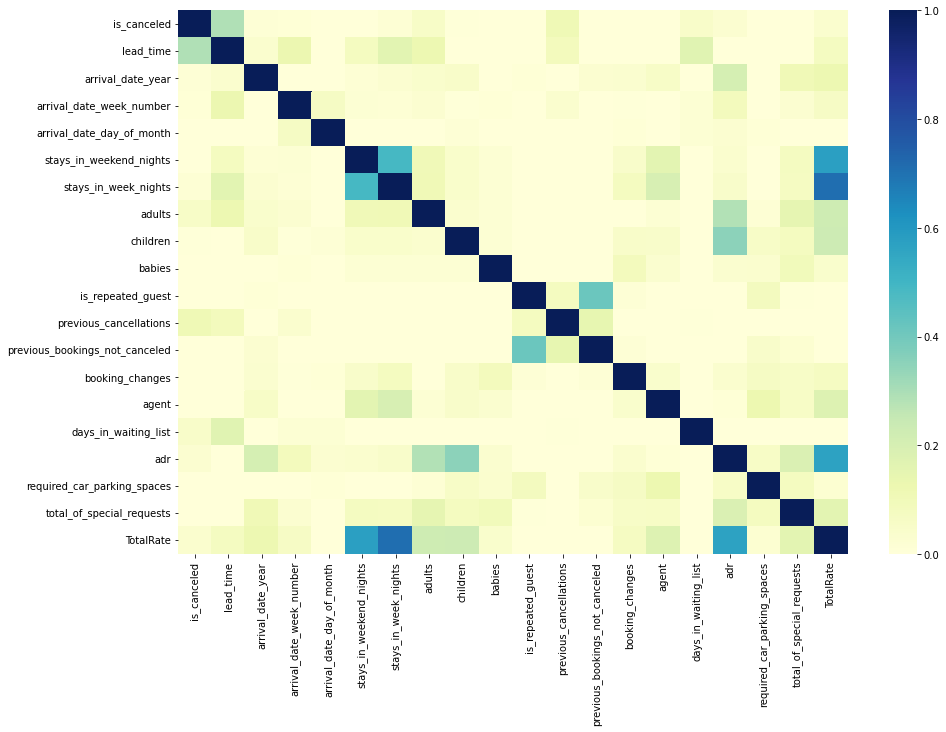

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10)) 
MatrixCorelation=df.corr()
ax = sns.heatmap(MatrixCorelation,vmin=0, vmax=1, cmap="YlGnBu")
#print(MatrixCorelation)

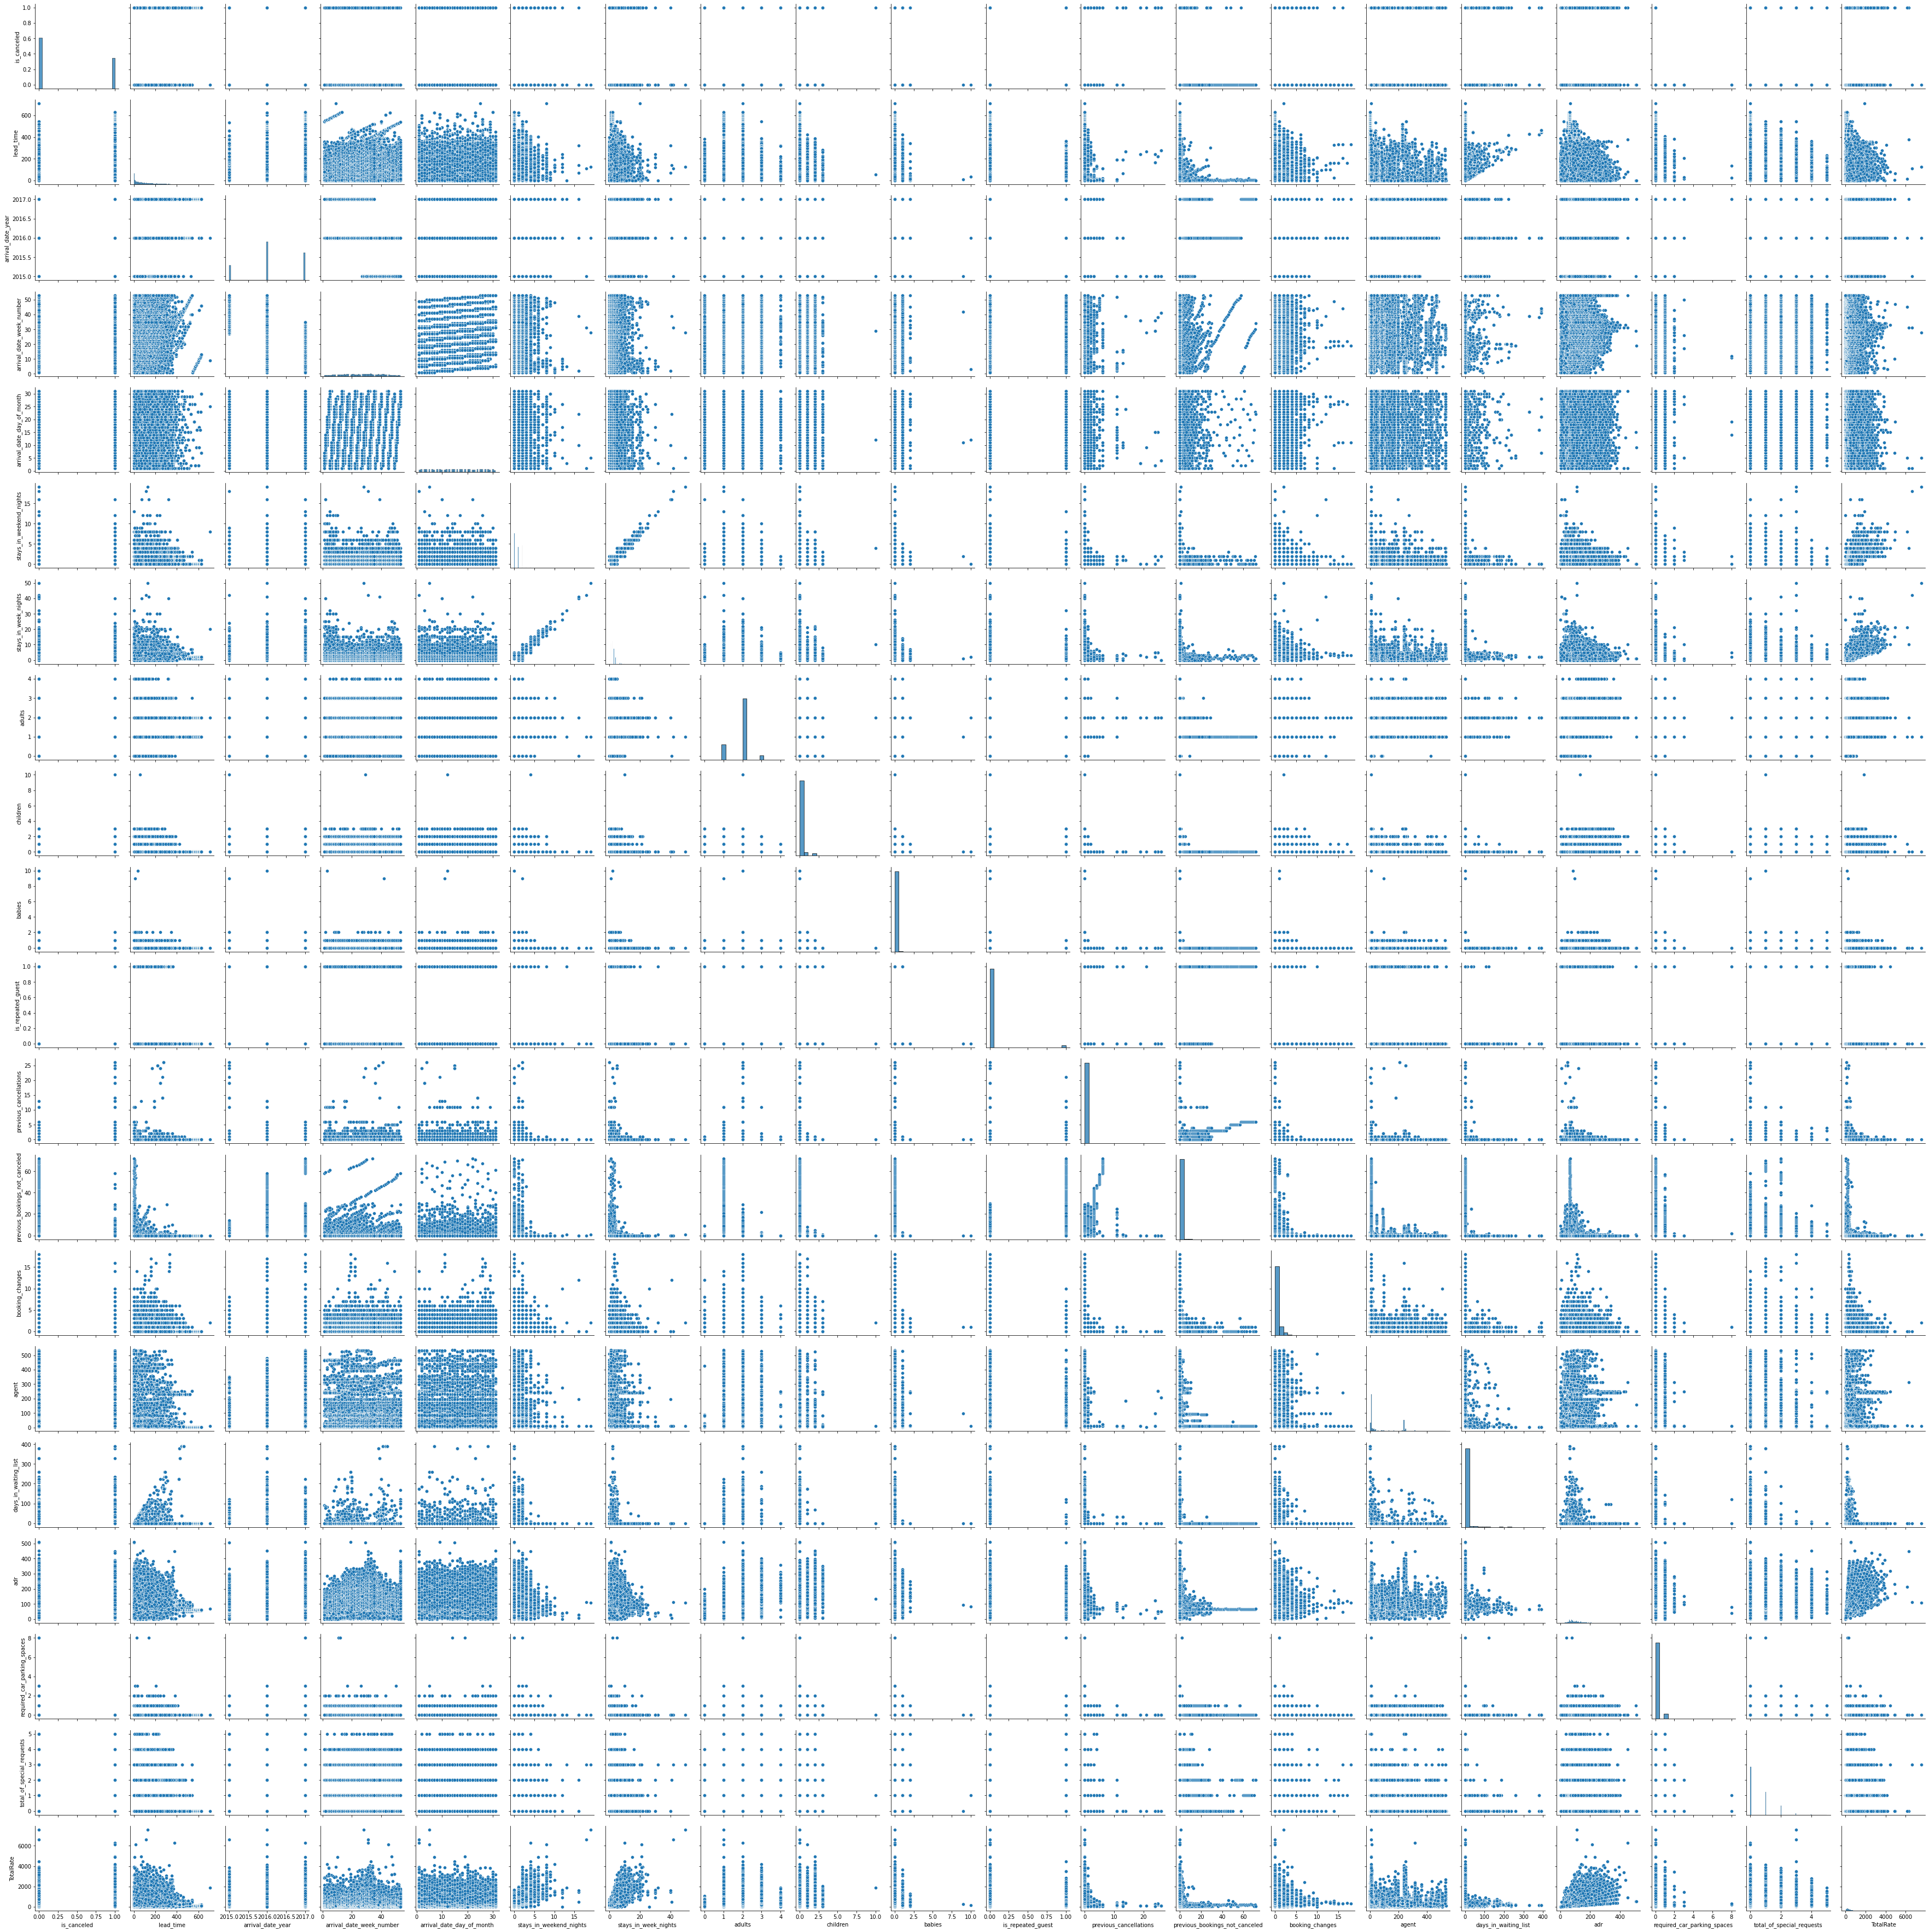

In [ ]:
sns.pairplot(df)

Partiendo del caso hipotético de que una compañía es dueña de estos dos hoteles (Resort Hotel y City Hotel) y que desea emplear este conjunto de datos para mejorar la gestión de ingresos y su estrategia de mercadeo asociada a cada uno, el EDA permite comenzar a visualizar patrones de ingresos y comprender mejor la información disponible.

Text(0, 0.5, 'Pago total')

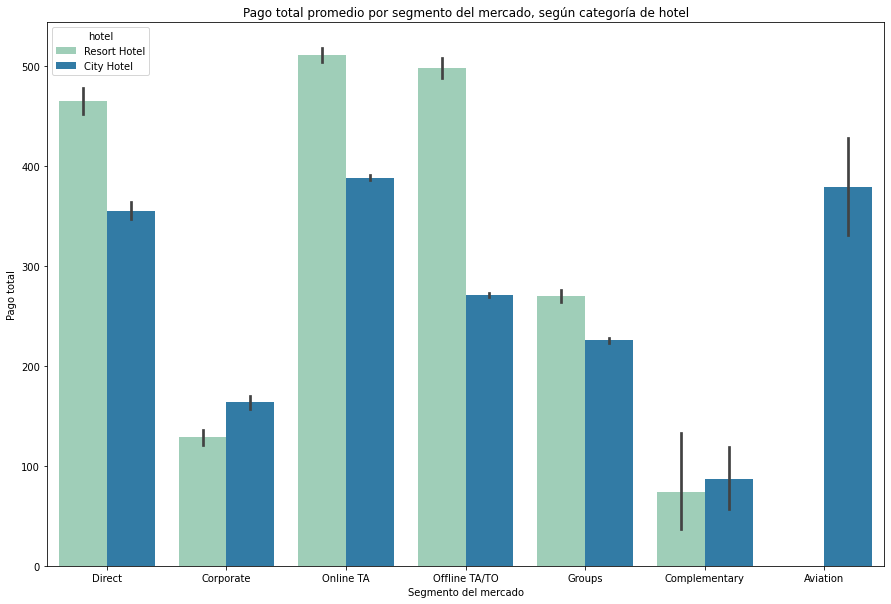

In [ ]:
plt.figure(figsize = (15, 10))
sns.barplot(x = 'market_segment', y = 'TotalRate', hue = 'hotel', data = df, palette = "YlGnBu")
plt.title('Pago total promedio por segmento del mercado, según categoría de hotel')
plt.xlabel('Segmento del mercado')
plt.ylabel('Pago total')

Una mirada rápida a los segmentos del mercado muestra que los ingresos totales promedio son más altos para el Resort Hotel cuando se trata de reservaciones directas, grupales y aquellas mediadas por agentes de viajes (TA) o tour operadores (TO). Por otro lado, el segmento de la aviación aporta ingresos exclusivamente al City Hotel, el cual a su vez también recibe una mayor cantidad de ingresos provenientes del sector corporativo.

Text(0, 0.5, 'Pago total')

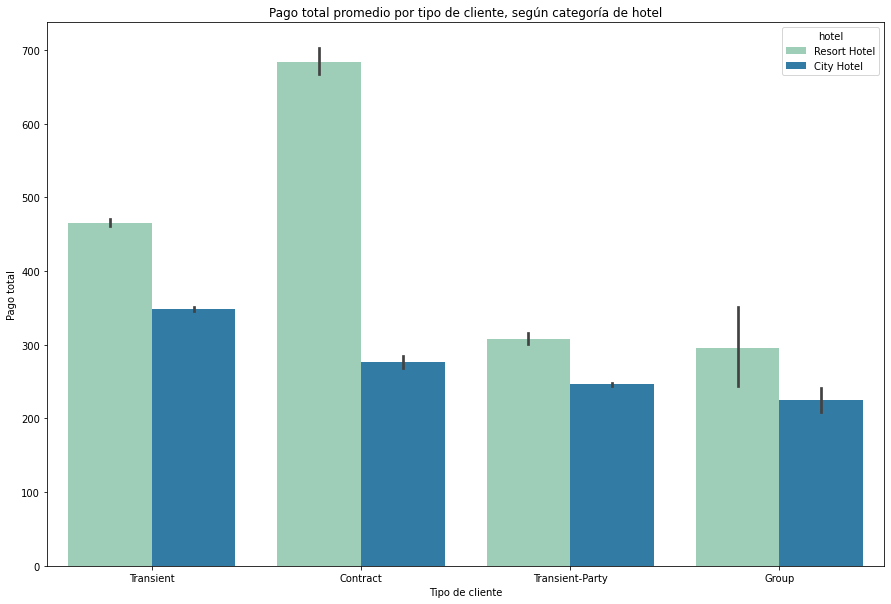

In [ ]:
plt.figure(figsize = (15, 10))
sns.barplot(x = 'customer_type', y = 'TotalRate', hue = 'hotel', data = df, palette = "YlGnBu")
plt.title('Pago total promedio por tipo de cliente, según categoría de hotel')
plt.xlabel('Tipo de cliente')
plt.ylabel('Pago total')

Además, el análisis exploratorio también muestra que independientemente del tipo de cliente (por convenio, transitorio o grupos), los ingresos totales promedio son mayores para las reservaciones que entran, y efectivamente se hospedan, en el Resort Hotel con respecto a las del City Hotel.

Text(0, 0.5, 'Ingreso acumulado (€)')

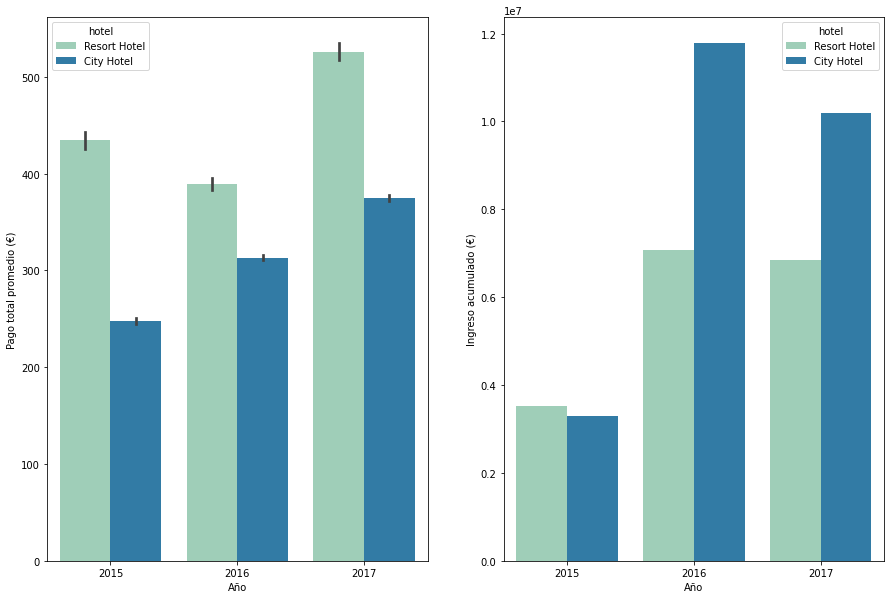

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
sns.barplot(x = 'arrival_date_year', y= 'TotalRate', hue = 'hotel', data = df,
            palette = 'YlGnBu', ax = axes[0])
sns.barplot(x = 'arrival_date_year', y= 'TotalRate', hue = 'hotel', data = df,
            palette = 'YlGnBu', estimator= sum, ci= None, ax = axes[1])
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Pago total promedio (€)')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Ingreso acumulado (€)')

Además, a pesar de que el pago total promedio de las reservaciones ha sido mayor en el Resort Hotel durante tres años consecutivos, se observa que los ingresos acumulados del City Hotel fueron muy superiores en los dos últimos años (2016 y 2017).

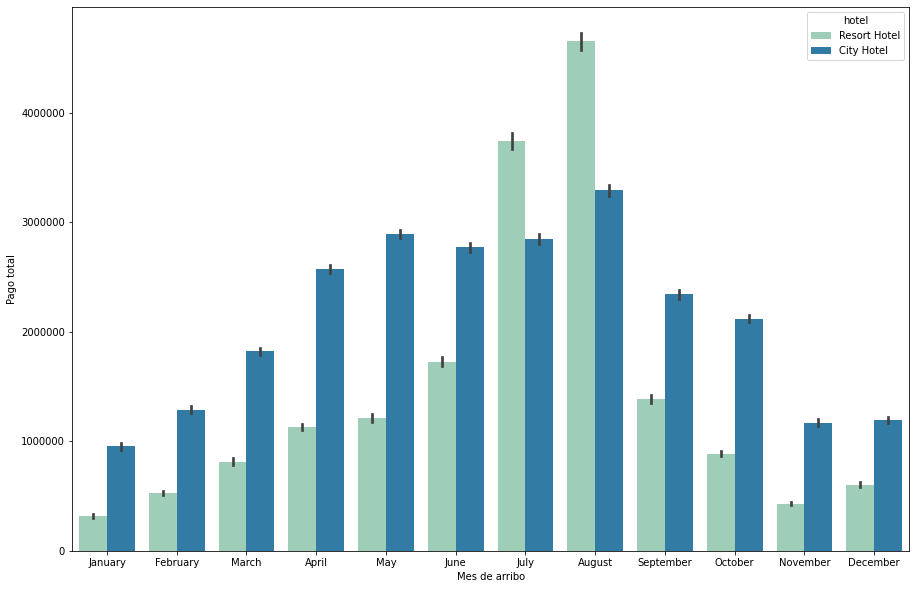

In [ ]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize = (15, 10))
ax = sns.barplot(x="arrival_date_month", y="TotalRate", data = df, hue = 'hotel', order=new_order, estimator=sum, palette = "YlGnBu")
plt.xlabel('Mes de arribo')
plt.ylabel('Pago total')
plt.ticklabel_format(style='plain', axis='y')

En términos de la época del año, se observa que la mayor cantidad de ingresos del Resort Hotel se generan durante los meses de julio y agosto, lo cual coincide con el final del verano y es esperable dado su enfoque turístico. Por otro lado, a pesar de que la distribución de ingresos es relativamente más estable en el City Hotel, posiblemente por la dinámica comercial y demanda constante que implica su ubicación en una ciudad capital europea, también se aprecia un incremento en los ingresos de dicho hotel entre abril y agosto.

Text(0, 0.5, 'Cliente que vuelve')

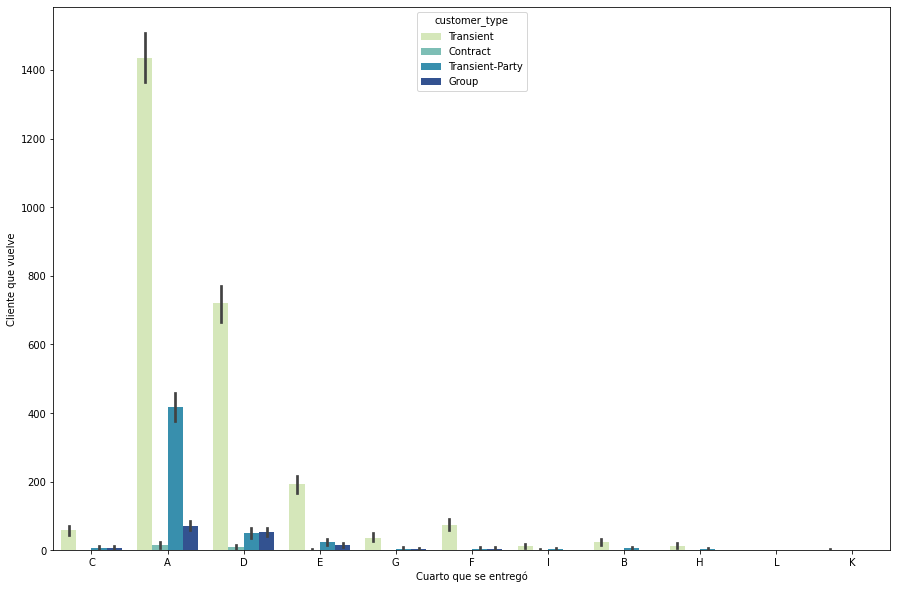

In [ ]:
plt.figure(figsize = (15, 10))
sns.barplot(x = 'assigned_room_type', y = 'is_repeated_guest', hue = 'customer_type', data = df, palette = "YlGnBu", estimator=sum) 
plt.xlabel('Cuarto que se entregó')
plt.ylabel('Cliente que vuelve')

Comparativa entre si el huesped ha visitado el hotel antes contra el cuarto que se le asignó. Podemos decir que los clientes que se les han entregado los cuartos de Tipo A o D vuelven al hotel. Una recomendación para los hoteles es que intenten copiar aspectos de esos cuartos y se los adhieran a los otros.


Text(0.5, 68.99999999999991, 'Plazo de procesamiento administrativo (días)')

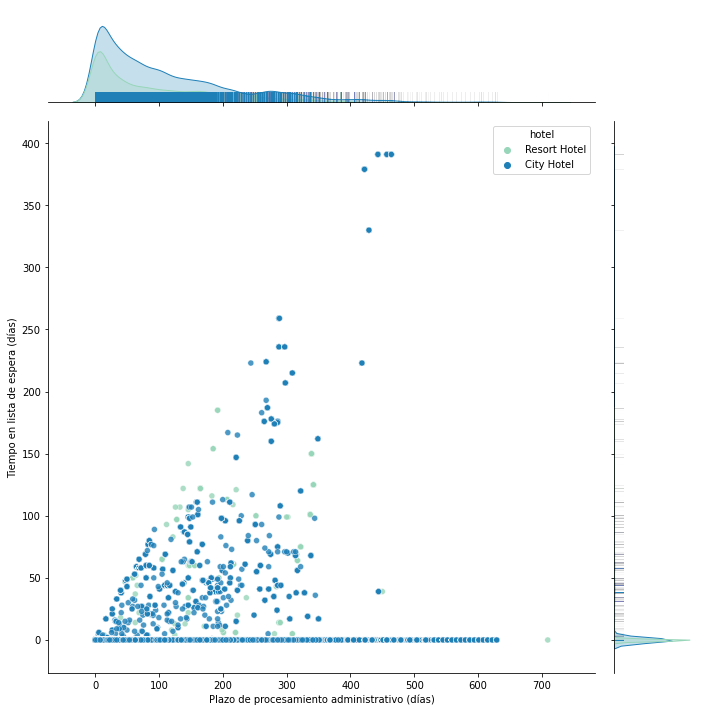

In [ ]:
wait = sns.jointplot(x = 'lead_time', y = 'days_in_waiting_list', data = df, hue = 'hotel',
                     height = 10, palette = 'YlGnBu', alpha =0.8)
wait.plot_marginals(sns.rugplot, height = 0.1, clip_on = False,
                    lw = 1, alpha = 0.005)
wait.ax_joint.set_ylabel('Tiempo en lista de espera (días)')
wait.ax_joint.set_xlabel('Plazo de procesamiento administrativo (días)')

Finalmente, se observa que relativamente pocas, pero algunas reservaciones tardan demasiado tiempo en lista de espera (medio año o más) antes de ser confirmadas. En dichos casos, las reservaciones pueden haber sido solicitadas con bastante antelación (un año o más), pero luego permanecen en lista de espera. Este un un aspecto que podría revisarse con más detalle, principalmente en el City Hotel, con el fin de mejorar la atención y los servicios brindados al cliente.